# Домашнее задание 3 - Проверка статистических гипотез и параметрические критерии

**ВАЖНО: Обязательно для каждой задачи строим график и показываем куда попадает наше значение, если в задаче нужно проверить статистическую гипотезу**
\
**При отсутствии графиков возможна полная потеря баллов за задание**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

### Задача 1 (1 балл)

Пусть X1,X2,…,Xn​ — независимые и одинаково распределенные случайные величины из нормального распределения с неизвестным средним μ и известной дисперсией σ^2=25. Из выборки объема n=64 получено выборочное среднее =102.
\
Проверьте гипотезу H0:μ=100 против альтернативы H1:μ>100 на уровне значимости α=0.01.
\
Вычислите p-значение этого теста.

Гипотеза H0 отвергается на уровне значимости 0.01
p-значение: 0.001


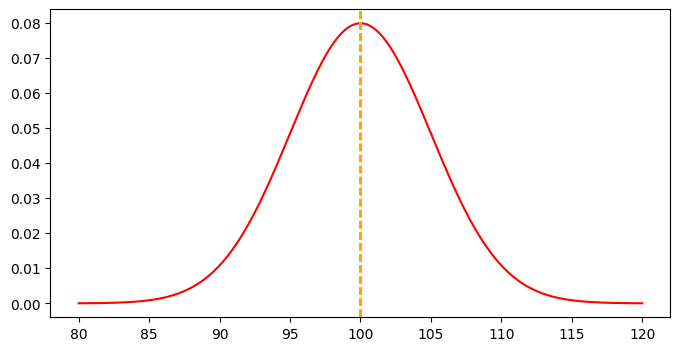

In [48]:
# Исходные данные
n = 64
sample_mean = 102
sigma = np.sqrt(25)
mu = 100
alpha = 0.01

# Вычисление статистики t-критерия
t_stat = (sample_mean - mu) / (sigma / np.sqrt(n))

# Вычисление p-значения
p_value = 1 - t.cdf(t_stat, n - 1)

# Проверка гипотезы
if p_value < alpha:
    print(f"Гипотеза H0 отвергается на уровне значимости {alpha}")
else:
    print(f"Гипотеза H0 не отвергается на уровне значимости {alpha}")

print(f"p-значение: {p_value:.3f}")

sample_norm = norm.rvs(sample_mean, sigma, size=n, random_state=12)

# Графическое представление
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 400)
axs.plot(x, norm.pdf(x, mu, sigma), color="red")

#axs.axvline(x=mu, color="black", linestyle="--")
#axs.axvline(x=sample_mean, color="blue", linestyle="--")
#axs.axvline(x=t_stat * sigma + mu, color="green", linestyle="--")

# Добавляем линии границ alpha
alpha_lower = mu - alpha * sigma
alpha_upper = mu + alpha * sigma
axs.axvline(x=alpha_lower, color="orange", linestyle="--")
axs.axvline(x=alpha_upper, color="orange", linestyle="--")

plt.show()

### Задача 2 (1 балл)

Даны три независимые выборки. Первая выборка объемом 35 наблюдений имеет выборочное среднее 10.2 и выборочную дисперсию 2.5. Вторая выборка объемом 30 наблюдений имеет выборочное среднее 9.8 и выборочную дисперсию 2.8. Третья выборка объемом 40 наблюдений имеет выборочное среднее 10.5 и выборочную дисперсию 3.0.

Проверьте гипотезу о том, что средние всех трех выборок равны, на уровне значимости 0.05.
Оцените статистическую значимость результатов и постройте доверительные интервалы c графиками для каждого из средних.

### Задача 3 (1 балл)

Тестирование параметра распределения Пуассона

Выборка из 60 наблюдений была получена из распределения Пуассона с неизвестным параметром. Известно, что среднее количество наблюдений в выборке равно 4.8.

Проверьте гипотезу о том, что параметр распределения Пуассона равен 5 против альтернативы, что он меньше 5. Используйте уровень значимости 0.05.
Вычислите p-значение и сделайте вывод о гипотезе.

### Задача 4 (1 балл)

Компания заявляет, что среднее время работы их нового аккумулятора составляет 100 часов. Независимая лаборатория протестировала 25 случайно выбранных аккумуляторов и получила среднее время работы 95 часов при стандартном отклонении 10 часов. Можно ли на уровне значимости 1% утверждать, что реальное среднее время работы аккумуляторов меньше заявленного?

### Задача 5 (1 балл)

В ходе медицинского исследования сравнивается эффективность нового препарата для снижения артериального давления с существующим. Первой группе из 30 пациентов назначают новый препарат, и среднее снижение давления составляет 8 мм рт. ст. со стандартным отклонением 2 мм рт. ст. Второй группе из 30 пациентов дают существующий препарат, и среднее снижение составляет 6 мм рт. ст. со стандартным отклонением 3 мм рт. ст. Является ли новый препарат более эффективным на уровне значимости 5%?

### Задача 6 (1 балл)

В университете внедрили новую методику преподавания математики и хотят оценить ее влияние на успеваемость студентов. Средний балл по математике в предыдущие годы был 75. После внедрения методики группа из 50 студентов получила средний балл 78 с стандартным отклонением 5. Проверить на уровне значимости 1%, улучшилась ли успеваемость студентов.

### Задача 7 (1 балл)

Производитель утверждает, что его новый процессор работает на 20% быстрее предыдущей модели. Для проверки этого заявления были протестированы 40 новых и 40 старых процессоров. Новые процессоры в среднем выполняли задачу за 8 секунд с стандартным отклонением 1 секунда, старые — за 10 секунд с стандартным отклонением 1,5 секунды. Соответствует ли утверждение производителя действительности на уровне значимости 2%?

### Задача 8 (1 балл)

После введения новых экологических стандартов исследователь хочет определить, снизился ли уровень загрязнения воздуха в городе. До введения стандартов средняя концентрация вредных веществ составляла 50 мкг/м³. Через год после внедрения было проведено 36 измерений, и средняя концентрация составила 47 мкг/м³ со стандартным отклонением 4 мкг/м³. Можно ли на уровне значимости 5% считать, что уровень загрязнения воздуха снизился?

### Задача 9 (1 балл)

В школе проводят эксперимент, чтобы выяснить, влияет ли дополнительное занятие по чтению на скорость чтения учеников. Учеников случайным образом разделили на две группы по 20 человек. Первая группа занималась по стандартной программе и показала среднюю скорость чтения 150 слов в минуту со стандартным отклонением 15 слов. Вторая группа посещала дополнительные занятия и показала среднюю скорость 160 слов в минуту со стандартным отклонением 10 слов. Является ли разница в скоростях статистически значимой на уровне значимости 5%?

### Задача 10 (1 балл)

Автомобильная компания хочет определить, влияет ли новый тип топлива на эффективность расхода топлива. В тесте участвовали 30 автомобилей, использующих обычное топливо, и 30 автомобилей на новом топливе. Средний расход для обычного топлива составил 8 литров на 100 км с стандартным отклонением 0,5 литра, для нового топлива — 7,5 литров на 100 км с стандартным отклонением 0,4 литра. Проверьте на уровне значимости 1%, улучшает ли новый тип топлива эффективность.

### Задача 11 (1 балл)

В исследовании психологии изучается влияние медитации на уровень стресса. Уровень стресса измеряется по шкале от 0 до 100. До начала программы медитации у группы из 25 участников средний уровень стресса был 70 с стандартным отклонением 8. После программы средний уровень снизился до 65 с стандартным отклонением 7. Является ли снижение уровня стресса статистически значимым на уровне значимости 5%?

### Задача 12 (1 балл)

Компания по производству напитков изменила рецепт своего продукта и хочет определить, повлияло ли это на предпочтения потребителей. В тестировании участвовали 200 человек, из которых 110 предпочли новый рецепт, а остальные остались нейтральны или выбрали старый. Можно ли на уровне значимости 1% утверждать, что большинство потребителей предпочитают новый рецепт?

### Задача 13 (1 балл)

В ходе эксперимента изучается влияние нового удобрения на рост растений. Группе из 15 растений добавляли новое удобрение, и средний рост составил 25 см с стандартным отклонением 3 см. Контрольная группа из 15 растений без удобрения показала средний рост 22 см с стандартным отклонением 2,5 см. Проверить на уровне значимости 5%, является ли разница в росте статистически значимой.

### Задача 14 (5 баллов за все пункты)

Пункт 1. Компания внедряет новую программу обучения сотрудников с целью повышения производительности труда. Ранее средняя производительность составляла 50 единиц в день при стандартном отклонении 8 единиц. После года действия программы случайно выбранная выборка из 80 сотрудников показала среднюю производительность 52 единицы. Считаем, что стандартное отклонение осталось неизменным. Можно ли на основе этих данных утверждать, что программа обучения действительно повысила производительность, или наблюдаемый результат мог возникнуть случайно? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста (двусторонний, левосторонний или правосторонний) и проверьте нулевую гипотезу на уровнях значимости α = 1% и α = 5%.


---

Пункт 2. Решите пункт 1, если выборка состоит лишь из 5 сотрудников.


---

Пункт 3. Решите пункт 1 при условии, что стандартное отклонение увеличилось до 16 единиц.


---

Пункт 4. Решите пункт 1, если после внедрения программы средняя производительность составила 51 единицу.


---

Пункт 5. Решите пункт 1, если стандартное отклонение неизвестно, а выборка составила 25 сотрудников. Несмещённая оценка дисперсии выборки составила 64. Примите уровень значимости равным 5%.

### Задача 15 (3 балла за все пункты)

Задача 1. Компания оценивает эффективность нового программного обеспечения для повышения производительности сотрудников. Перед установкой ПО среднее время выполнения определённой задачи у 60 сотрудников составляло 100 минут с известным стандартным отклонением 12 минут. После установки нового ПО среднее время выполнения той же задачи снизилось до 95 минут. Считаем, что стандартное отклонение осталось неизменным. Можно ли на уровне значимости α = 5% утверждать, что новое ПО действительно снижает время выполнения задачи? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста и проверьте нулевую гипотезу.


---

Задача 2. Решите задачу 1, если стандартное отклонение после установки нового ПО неизвестно, а выборка составляет 25 сотрудников. По полученным данным несмещённая оценка дисперсии после установки ПО составляет 144 минуты².


---

Задача 3. Компания сравнивает эффективность двух независимых групп сотрудников: первая группа из 50 человек использует старое ПО, вторая группа из 50 человек — новое ПО. Среднее время выполнения задачи в первой группе составляет 100 минут со стандартным отклонением 12 минут, во второй группе — 95 минут со стандартным отклонением 12 минут. Можно ли на уровне значимости α = 5% утверждать, что новое ПО снижает время выполнения задачи по сравнению со старым?


---

Задача 4. Для оценки влияния обучающего курса на навыки сотрудников компания измеряет время выполнения задачи у 30 сотрудников до и после прохождения курса. Среднее время до обучения составляет 80 минут, после обучения — 75 минут. Известно, что стандартное отклонение разностей времени (до и после) составляет 5 минут. Можно ли на уровне значимости α = 1% утверждать, что обучение улучшило навыки сотрудников? Сформулируйте нулевую и альтернативную гипотезы и выберите подходящий статистический тест.


---

Задача 5. Решите задачу 4, если стандартное отклонение разностей времени неизвестно, а несмещённая оценка дисперсии разностей составляет 25 минут². Примите уровень значимости равным 1%.

### Задача 16 (4 балла за все пункты)

Монетку подбросили n=150 раз. Из них выпало Y орлов. Вероятность выпадения орла равна p.

(a) При каких значениях Y вы отвергнете нулевую гипотезу H0:p=1/2 против односторонней альтернативы p>1/2 на уровне значимости α=0.05?

(b) Предположим, что на самом деле H0​ не выполняется, а выполняется H1​, и вероятность выпадения орла равна p=1/2+δ, где δ=1/10. При этом мы не знаем точное значение pp, но действуем согласно нашему критерию. С какой вероятностью мы при этом отвергнем гипотезу H0​? Какова вероятность совершить ошибку второго рода (не отвергнуть H0​, когда H1​ истинна)?

(c) Решите ту же задачу для δ=1/100.

(d) Решите ту же задачу для δ=1/100 и n=1000.